- Historigramas de quantos jogos cada gênero possui nos primeiros 150 títulos do rank.
- Um gráfico de dispersão entre o ano de publicação e o total de vendas da Nitendo nos últimos 10 anos.
- As 5 maiores 'publishers' em vendas nos Estados Unidos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd

data = files.upload()

Saving dataset_video_games.csv to dataset_video_games.csv


In [ ]:
df= pd.read_csv(io.StringIO(data['dataset_video_games.csv'].decode('utf-8')))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go


In [ ]:
df.head

<bound method NDFrame.head of         Rank  ... Global_Sales
0          1  ...        82.74
1          2  ...        40.24
2          3  ...        35.82
3          4  ...        33.00
4          5  ...        31.37
...      ...  ...          ...
16593  16596  ...         0.01
16594  16597  ...         0.01
16595  16598  ...         0.01
16596  16599  ...         0.01
16597  16600  ...         0.01

[16598 rows x 11 columns]>

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.shape

(16598, 11)

In [ ]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
print(df['Platform'].value_counts().head(5))
print(df['Platform'].nunique())
print(df['Publisher'].value_counts().head(5))
print(df['Publisher'].nunique())
print(df['Genre'].value_counts().head(5))
print(df['Genre'].nunique())

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64
31
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
Name: Publisher, dtype: int64
578
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64
12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df.dropna(inplace= True)


In [ ]:
df.isnull().sum()


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
years = df['Year'].unique()
years.sort()
years

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.])

In [ ]:
df['Name'].value_counts()

Need for Speed: Most Wanted                                                     12
Ratatouille                                                                      9
FIFA 14                                                                          9
LEGO Marvel Super Heroes                                                         9
LEGO Star Wars II: The Original Trilogy                                          8
                                                                                ..
Space Invaders Revolution                                                        1
Magic: The Gathering - Battlegrounds                                             1
Diabolik Lovers: Lunatic Parade                                                  1
Dragon Quest 25 Shuunen Kinin: Famicom & Super Famicom Dragon Quest I-II-III     1
Jikkyou Powerful Pro Yakyuu '99 Ketteiban                                        1
Name: Name, Length: 11325, dtype: int64

In [ ]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
numerical_df = df.select_dtypes(('int', 'float'))

numerical_df.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37


In [ ]:
df['Genre'].value_counts().sort_index()

Action          3251
Adventure       1274
Fighting         836
Misc            1686
Platform         875
Puzzle           570
Racing          1225
Role-Playing    1470
Shooter         1282
Simulation       848
Sports          2304
Strategy         670
Name: Genre, dtype: int64

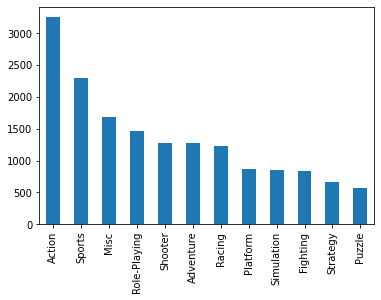

In [ ]:
df['Genre'].value_counts().plot.bar()

Grafico de dispersão entre ano de publicação e Total de Vendas da Nitendo dos últimos 10 anos

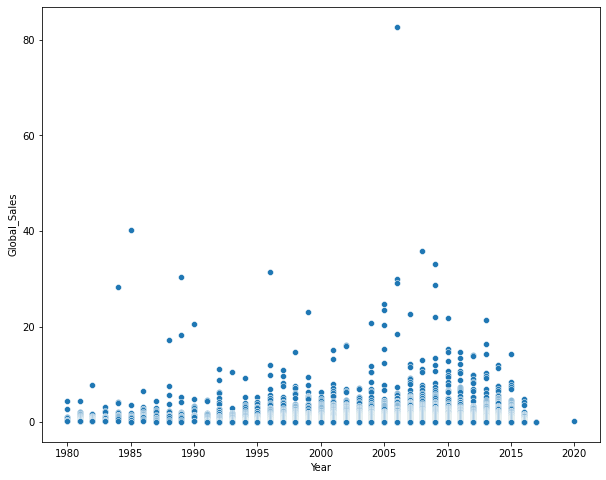

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Year', y='Global_Sales' , data=df)
plt.show()

Número de jogos produzidos por cada gênero


In [ ]:
x2016 = df.Genre[df.Year == 2016]
x2006 = df.Genre[df.Year == 2010]

trace1 = go.Histogram(
                        x = x2016,
                        opacity = 0.75,
                        name = "2016",
                        marker = dict(color="rgba(162,50,70,0.9)"))
trace2 = go.Histogram(
                        x = x2006,
                        opacity = 0.75,
                        name = "2010",
                        marker = dict(color="rgba(24,68,200,0.6)"))

data = [trace1,trace2]
layout = go.Layout(barmode = "overlay",
                    title = "Number of Genres in 2016 and 2010 ",
                  xaxis = dict(title="Genre"),
                  yaxis = dict(title = "Count"),
                  )
fig = go.Figure(data=data,layout=layout)
py.offline.iplot(fig)

NameError: ignored

In [ ]:
df[df['Publisher'] == 'Nintendo'] [df['Year'] == 2010]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
78,79,Wii Party,Wii,2010.0,Misc,Nintendo,1.79,3.53,2.49,0.68,8.49
91,92,Super Mario Galaxy 2,Wii,2010.0,Platform,Nintendo,3.66,2.42,0.98,0.64,7.69
125,126,Donkey Kong Country Returns,Wii,2010.0,Platform,Nintendo,3.25,1.84,1.03,0.47,6.59
558,559,Mario vs. Donkey Kong: Mini-Land Mayhem!,DS,2010.0,Puzzle,Nintendo,1.63,0.52,0.35,0.18,2.69
587,588,Super Mario All-Stars: Limited Edition,Wii,2010.0,Platform,Nintendo,1.02,0.52,0.92,0.14,2.60
598,599,Art Academy,DS,2010.0,Misc,Nintendo,0.28,1.68,0.33,0.28,2.57
773,775,Kirby's Epic Yarn,Wii,2010.0,Platform,Nintendo,1.47,0.09,0.45,0.11,2.12
781,783,Mario Sports Mix,Wii,2010.0,Sports,Nintendo,0.90,0.45,0.63,0.13,2.11
956,958,Dragon Quest VI: Realms of Revelation,DS,2010.0,Role-Playing,Nintendo,0.22,0.21,1.35,0.03,1.81


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe86aaac490>,
      dtype=object)

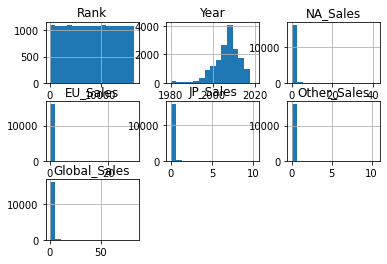

In [ ]:
df.loc[:'Genre'].hist(bins = 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



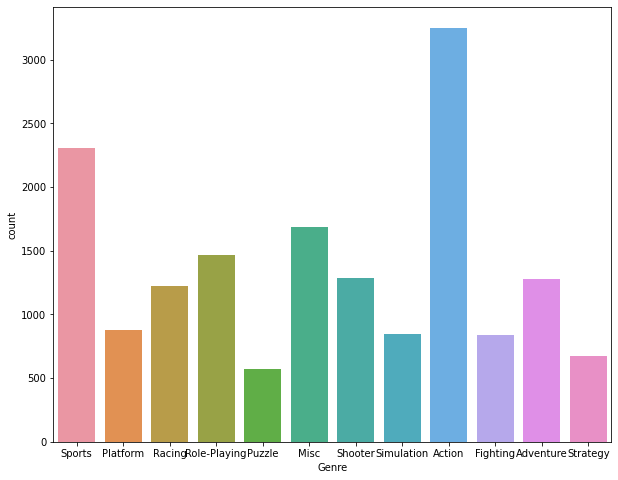

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot("Genre", data=df)
plt.show()

5 maiores Publishers em vendas nos Estados Unidos

In [ ]:
df_publisher.sort_values(by = 'NA_Sales', ascending = False).head(5)

,Publisher,NA_Sales
359,Nintendo,815.75
138,Electronic Arts,584.22
21,Activision,426.01
455,Sony Computer Entertainment,265.22
524,Ubisoft,252.81
